<a href="https://colab.research.google.com/github/Mukund103/FaceRecognisation/blob/master/transferLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras

Using TensorFlow backend.


In [0]:
from keras.applications import MobileNet

In [3]:
# MobileNet was designed to work on 224 x 224 pixel input images sizes
# Re-loads the MobileNet model without the top or FC layers
MobileNet=MobileNet(weights="imagenet",include_top=False,input_shape = (224, 224, 3))

17227776/17225924 [==============================] - 1s 0us/step


In [0]:
# Here we freeze the last 4 layers 
# Layers are set to trainable as True by default
for layer in  MobileNet.layers:
  layer.trainable=False

In [5]:
# Let's print our layers 
for (i,layer) in enumerate(MobileNet.layers):
    print(str(i) + " "+ layer.__class__.__name__, layer.trainable)

0 InputLayer False
1 ZeroPadding2D False
2 Conv2D False
3 BatchNormalization False
4 ReLU False
5 DepthwiseConv2D False
6 BatchNormalization False
7 ReLU False
8 Conv2D False
9 BatchNormalization False
10 ReLU False
11 ZeroPadding2D False
12 DepthwiseConv2D False
13 BatchNormalization False
14 ReLU False
15 Conv2D False
16 BatchNormalization False
17 ReLU False
18 DepthwiseConv2D False
19 BatchNormalization False
20 ReLU False
21 Conv2D False
22 BatchNormalization False
23 ReLU False
24 ZeroPadding2D False
25 DepthwiseConv2D False
26 BatchNormalization False
27 ReLU False
28 Conv2D False
29 BatchNormalization False
30 ReLU False
31 DepthwiseConv2D False
32 BatchNormalization False
33 ReLU False
34 Conv2D False
35 BatchNormalization False
36 ReLU False
37 ZeroPadding2D False
38 DepthwiseConv2D False
39 BatchNormalization False
40 ReLU False
41 Conv2D False
42 BatchNormalization False
43 ReLU False
44 DepthwiseConv2D False
45 BatchNormalization False
46 ReLU False
47 Conv2D False
48 Batc

In [0]:
x=MobileNet.output

In [7]:
x

<tf.Tensor 'conv_pw_13_relu/Relu6:0' shape=(None, 7, 7, 1024) dtype=float32>

In [0]:
### Let's add our FC Head back onto MobileNet

In [0]:
from keras.models import Sequential
from keras.layers import Dense, GlobalAveragePooling2D
from keras.layers import Conv2D
#from keras.layers.normalization import BatchNormalization
from keras.models import Model

In [0]:
x=GlobalAveragePooling2D()(x)


In [0]:
x=Dense(units=1024,activation="relu")(x)

In [0]:
x=Dense(units=1024,activation="relu")(x)

In [0]:
x=Dense(units=512,activation="relu")(x)

In [0]:
x=Dense(units=2,activation="softmax")(x)

In [0]:
model=Model(inputs=MobileNet.input,outputs=x)

In [16]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128 

In [17]:
model.output

<tf.Tensor 'dense_4/Softmax:0' shape=(None, 2) dtype=float32>

In [0]:
### Loading our Face Data Set.Here our data set containing images of Narendra Modi and Abdul Kalam

In [0]:
from keras.preprocessing.image import ImageDataGenerator

In [0]:
# Let's use some data augmentaiton 
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)


In [0]:
from keras.callbacks import ModelCheckpoint, EarlyStopping


In [0]:

### Training out Model
### Note we're using checkpointing and early stopping
checkpoint = ModelCheckpoint("FaceRec_mobileNet.h5",
                             monitor="val_loss",
                             mode="min",
                             save_best_only = True,
                             verbose=1)

earlystop = EarlyStopping(monitor = 'val_loss', 
                          min_delta = 0, 
                          patience = 3,
                          verbose = 1,
                          restore_best_weights = True)

In [0]:
callbacks = [earlystop, checkpoint]


In [24]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
train_data_dir = 'FaceRec/train/'
validation_data_dir = 'FaceRec/test/'

Archive:  FaceRec.zip
   creating: FaceRec/
   creating: FaceRec/test/
   creating: FaceRec/test/Abdul Kalam/
  inflating: FaceRec/test/Abdul Kalam/images (1).jpg  
  inflating: FaceRec/test/Abdul Kalam/images (2).jpg  
  inflating: FaceRec/test/Abdul Kalam/images (3).jpg  
  inflating: FaceRec/test/Abdul Kalam/images (34).jpg  
  inflating: FaceRec/test/Abdul Kalam/images (4).jpg  
  inflating: FaceRec/test/Abdul Kalam/images (5).jpg  
  inflating: FaceRec/test/Abdul Kalam/images (6).jpg  
  inflating: FaceRec/test/Abdul Kalam/images (7).jpg  
  inflating: FaceRec/test/Abdul Kalam/images (8).jpg  
  inflating: FaceRec/test/Abdul Kalam/images (9).jpg  
  inflating: FaceRec/test/Abdul Kalam/images.jpg  
   creating: FaceRec/test/Narendra Modi/
  inflating: FaceRec/test/Narendra Modi/images (1).jpg  
  inflating: FaceRec/test/Narendra Modi/images (2).jpg  
  inflating: FaceRec/test/Narendra Modi/images (3).jpg  
  inflating: FaceRec/test/Narendra Modi/images (33).jpg  
  inflating: FaceR

In [31]:
train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical')
 
test_generator = test_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical')

Found 95 images belonging to 2 classes.
Found 18 images belonging to 2 classes.


In [32]:
train_generator.class_indices

{'Abdul kalam': 0, 'Narendra Modi': 1}

In [0]:
nb_train_samples = 95
nb_validation_samples = 18

In [0]:
epochs = 5
batch_size = 16


In [35]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = keras.optimizers.RMSprop(lr = 0.001),
              metrics = ['accuracy'])

history = model.fit_generator(
    train_generator,
    steps_per_epoch = nb_train_samples // batch_size,
    epochs = epochs,
    callbacks = callbacks,
    validation_data = test_generator,
    validation_steps = nb_validation_samples // batch_size)

Epoch 1/5
5/5 [==============================] - 12s 2s/step - loss: 16.7300 - accuracy: 0.5506 - val_loss: 0.6998 - val_accuracy: 0.6111

Epoch 00001: val_loss improved from inf to 0.69983, saving model to FaceRec_mobileNet.h5
Epoch 2/5
5/5 [==============================] - 10s 2s/step - loss: 1.3840 - accuracy: 0.6646 - val_loss: 0.3180 - val_accuracy: 0.8889

Epoch 00002: val_loss improved from 0.69983 to 0.31804, saving model to FaceRec_mobileNet.h5
Epoch 3/5
5/5 [==============================] - 10s 2s/step - loss: 0.5051 - accuracy: 0.7799 - val_loss: 1.7813 - val_accuracy: 0.3889

Epoch 00003: val_loss did not improve from 0.31804
Epoch 4/5
5/5 [==============================] - 9s 2s/step - loss: 0.3550 - accuracy: 0.8861 - val_loss: 0.3106 - val_accuracy: 0.8333

Epoch 00004: val_loss improved from 0.31804 to 0.31064, saving model to FaceRec_mobileNet.h5
Epoch 5/5
5/5 [==============================] - 10s 2s/step - loss: 0.5869 - accuracy: 0.7987 - val_loss: 0.4604 - val_ac

In [0]:
from keras.preprocessing import image


In [0]:
img = image.load_img("FaceRec/test/Narendra Modi/images.jpg", target_size=(224, 224))

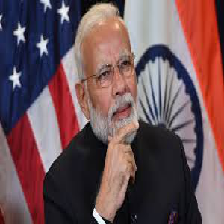

In [38]:
#image that need to be predicted
img

In [0]:
from keras.applications.mobilenet import preprocess_input,decode_predictions
import numpy as np

In [0]:
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)


In [41]:
preds[0]

array([0.07333738, 0.9266626 ], dtype=float32)

In [0]:
def expect(pred):
  if pred[0][0]>pred[0][1]:
    print("Abdul Kalam")
  else:
    print("Narendra Modi")

In [43]:
#predicted value
expect(preds)

Narendra Modi


In [0]:
img1 = image.load_img("FaceRec/test/Abdul Kalam//images (1).jpg", target_size=(224, 224))

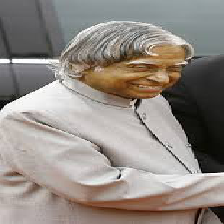

In [45]:
#image that need to be predicted
img1

In [0]:
x1 = image.img_to_array(img1)
x1 = np.expand_dims(x1, axis=0)
x1 = preprocess_input(x1)

preds1 = model.predict(x1)


In [47]:
preds1

array([[0.52952   , 0.47047997]], dtype=float32)

In [48]:
#predicted value
expect(preds1)

Abdul Kalam


In [0]:
from keras.models import load_model

classifier = load_model('FaceRec_mobileNet.h5')

In [0]:
import os
import cv2
import numpy as np
from os import listdir
from os.path import isfile, join
from google.colab.patches import cv2_imshow


In [0]:
face_dict_n = {"Abdul Kalam": "Abdul Kalam ", 
                      "Narendra Modi": "Naredndra Modi"
                      }
face_dict = {"[0]": "Abdul Kalam ", 
                      "[1]": "Narendra Modi"}


In [0]:
def draw_test(name, pred, im):
    face = face_dict[str(pred)]
    BLACK = [0,0,0]
    expanded_image = cv2.copyMakeBorder(im, 80, 0, 0, 100 ,cv2.BORDER_CONSTANT,value=BLACK)
    cv2.putText(expanded_image, face, (20, 60) , cv2.FONT_HERSHEY_SIMPLEX,1, (0,0,255), 2)
    cv2_imshow( expanded_image)

In [0]:
def getRandomImage(path):
    """function loads a random images from a random folder in our test path """
    folders = list(filter(lambda x: os.path.isdir(os.path.join(path, x)), os.listdir(path)))
    random_directory = np.random.randint(0,len(folders))
    path_class = folders[random_directory]
    print("Class - " + face_dict_n[str(path_class)])
    file_path = path + path_class
    file_names = [f for f in listdir(file_path) if isfile(join(file_path, f))]
    random_file_index = np.random.randint(0,len(file_names))
    image_name = file_names[random_file_index]
    return cv2.imread(file_path+"/"+image_name)    

Class - Abdul Kalam 


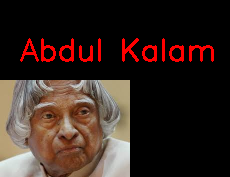

Class - Abdul Kalam 


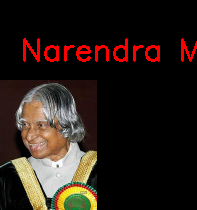

Class - Abdul Kalam 


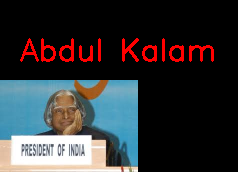

Class - Naredndra Modi


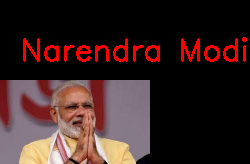

Class - Naredndra Modi


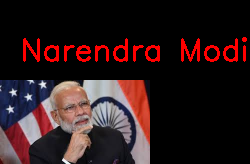

In [69]:
for i in range(0,5):
  input_im = getRandomImage("FaceRec/test/")
  input_original = input_im.copy()
  input_original = cv2.resize(input_original, None, fx=0.5, fy=0.5, interpolation = cv2.INTER_LINEAR)
    
  input_im = cv2.resize(input_im, (224, 224), interpolation = cv2.INTER_LINEAR)
  input_im = input_im / 255.
  input_im = input_im.reshape(1,224,224,3)
  res = np.argmax(classifier.predict(input_im, 1, verbose = 0), axis=1) 
  draw_test("Prediction", res, input_original) 
  cv2.waitKey(0)
cv2.destroyAllWindows()